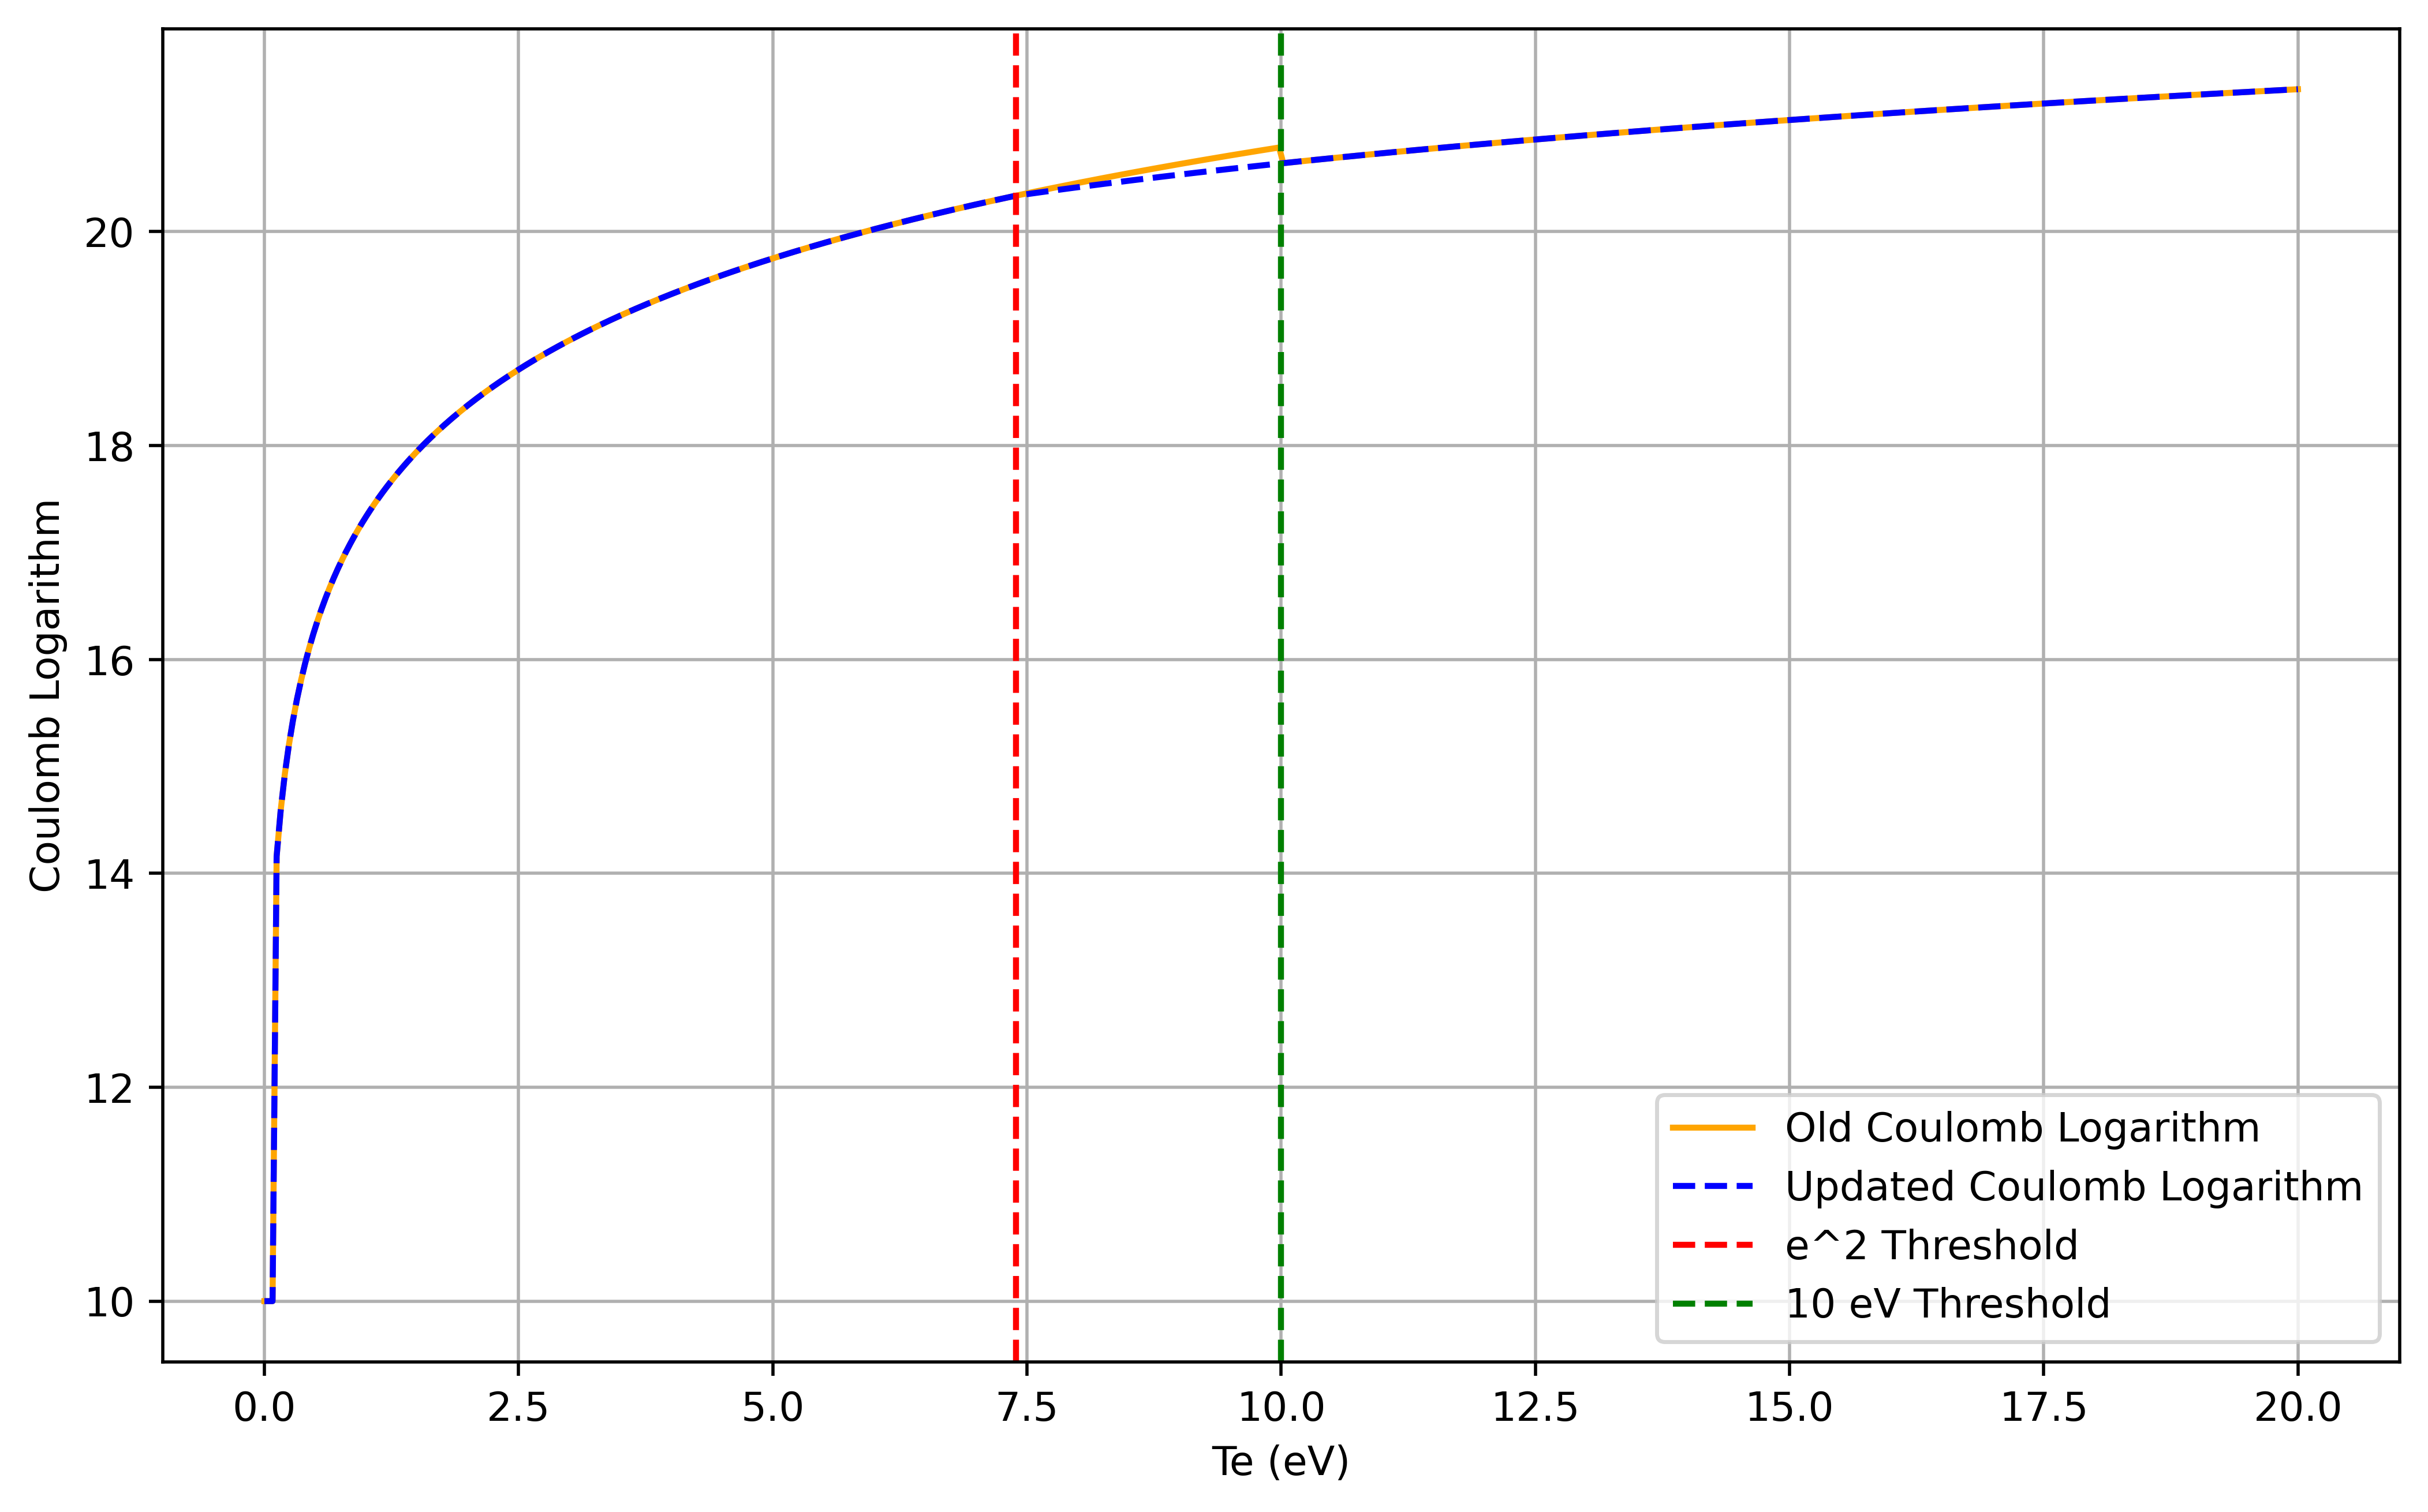

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the function
Ni = 1e11  # Example ion density in m^-3
Ne = 1e11  # Example electron density in m^-3
Ti = 1.0   # Example ion temperature in keV
me_mi = 5.44e-4  # Electron mass to ion mass ratio for protons
Zi = 1      # Charge number for protons
Ai = 1      # Atomic mass number for protons

# Function that returns the Coulomb logarithm based on Te
def coulomb_log_new(Te):
    if (Te < 0.1) or (Ni < 1e10) or (Ne < 1e10):
        return 10
    elif Te < Ti * me_mi:
        return 23 - 0.5 * np.log(Ni) + 1.5 * np.log(Ti) - np.log(Zi**2 * Ai)
    # elif Te < 10:
    elif Te < np.exp(2.0):  # Stefan's magic number e^2
        return 30.0 - 0.5 * np.log(Ne) - np.log(Zi) + 1.5 * np.log(Te)
    else:
        return 31.0 - 0.5 * np.log(Ne) + np.log(Te)

def coulomb_log_old(Te):
    if (Te < 0.1) or (Ni < 1e10) or (Ne < 1e10):
        return 10
    elif Te < Ti * me_mi:
        return 23 - 0.5 * np.log(Ni) + 1.5 * np.log(Ti) - np.log(Zi**2 * Ai)
    elif Te < 10:
    # elif Te < np.exp(2.0):  # Stefan's magic number e^2
        return 30.0 - 0.5 * np.log(Ne) - np.log(Zi) + 1.5 * np.log(Te)
    else:
        return 31.0 - 0.5 * np.log(Ne) + np.log(Te)

# Generate values for Te up to 100 eV (0.1 keV)
Te_values = np.linspace(0, 20, 500)
coulomb_log_values_new = [coulomb_log_new(Te) for Te in Te_values]
coulomb_log_values_old = [coulomb_log_old(Te) for Te in Te_values]

# Plotting the Coulomb logarithm
plt.figure(figsize=(10, 6), dpi = 500)
plt.plot(Te_values, coulomb_log_values_old, label="Old Coulomb Logarithm", color='orange')
plt.plot(Te_values, coulomb_log_values_new, label="Updated Coulomb Logarithm", color='blue', linestyle = '--')
plt.axvline(x=np.exp(2), color='red', linestyle='--', label='e^2 Threshold')
plt.axvline(x=10, color='green', linestyle='--', label='10 eV Threshold')
plt.xlabel("Te (eV)")
plt.ylabel("Coulomb Logarithm")
plt.legend()
plt.grid(True)
plt.show()


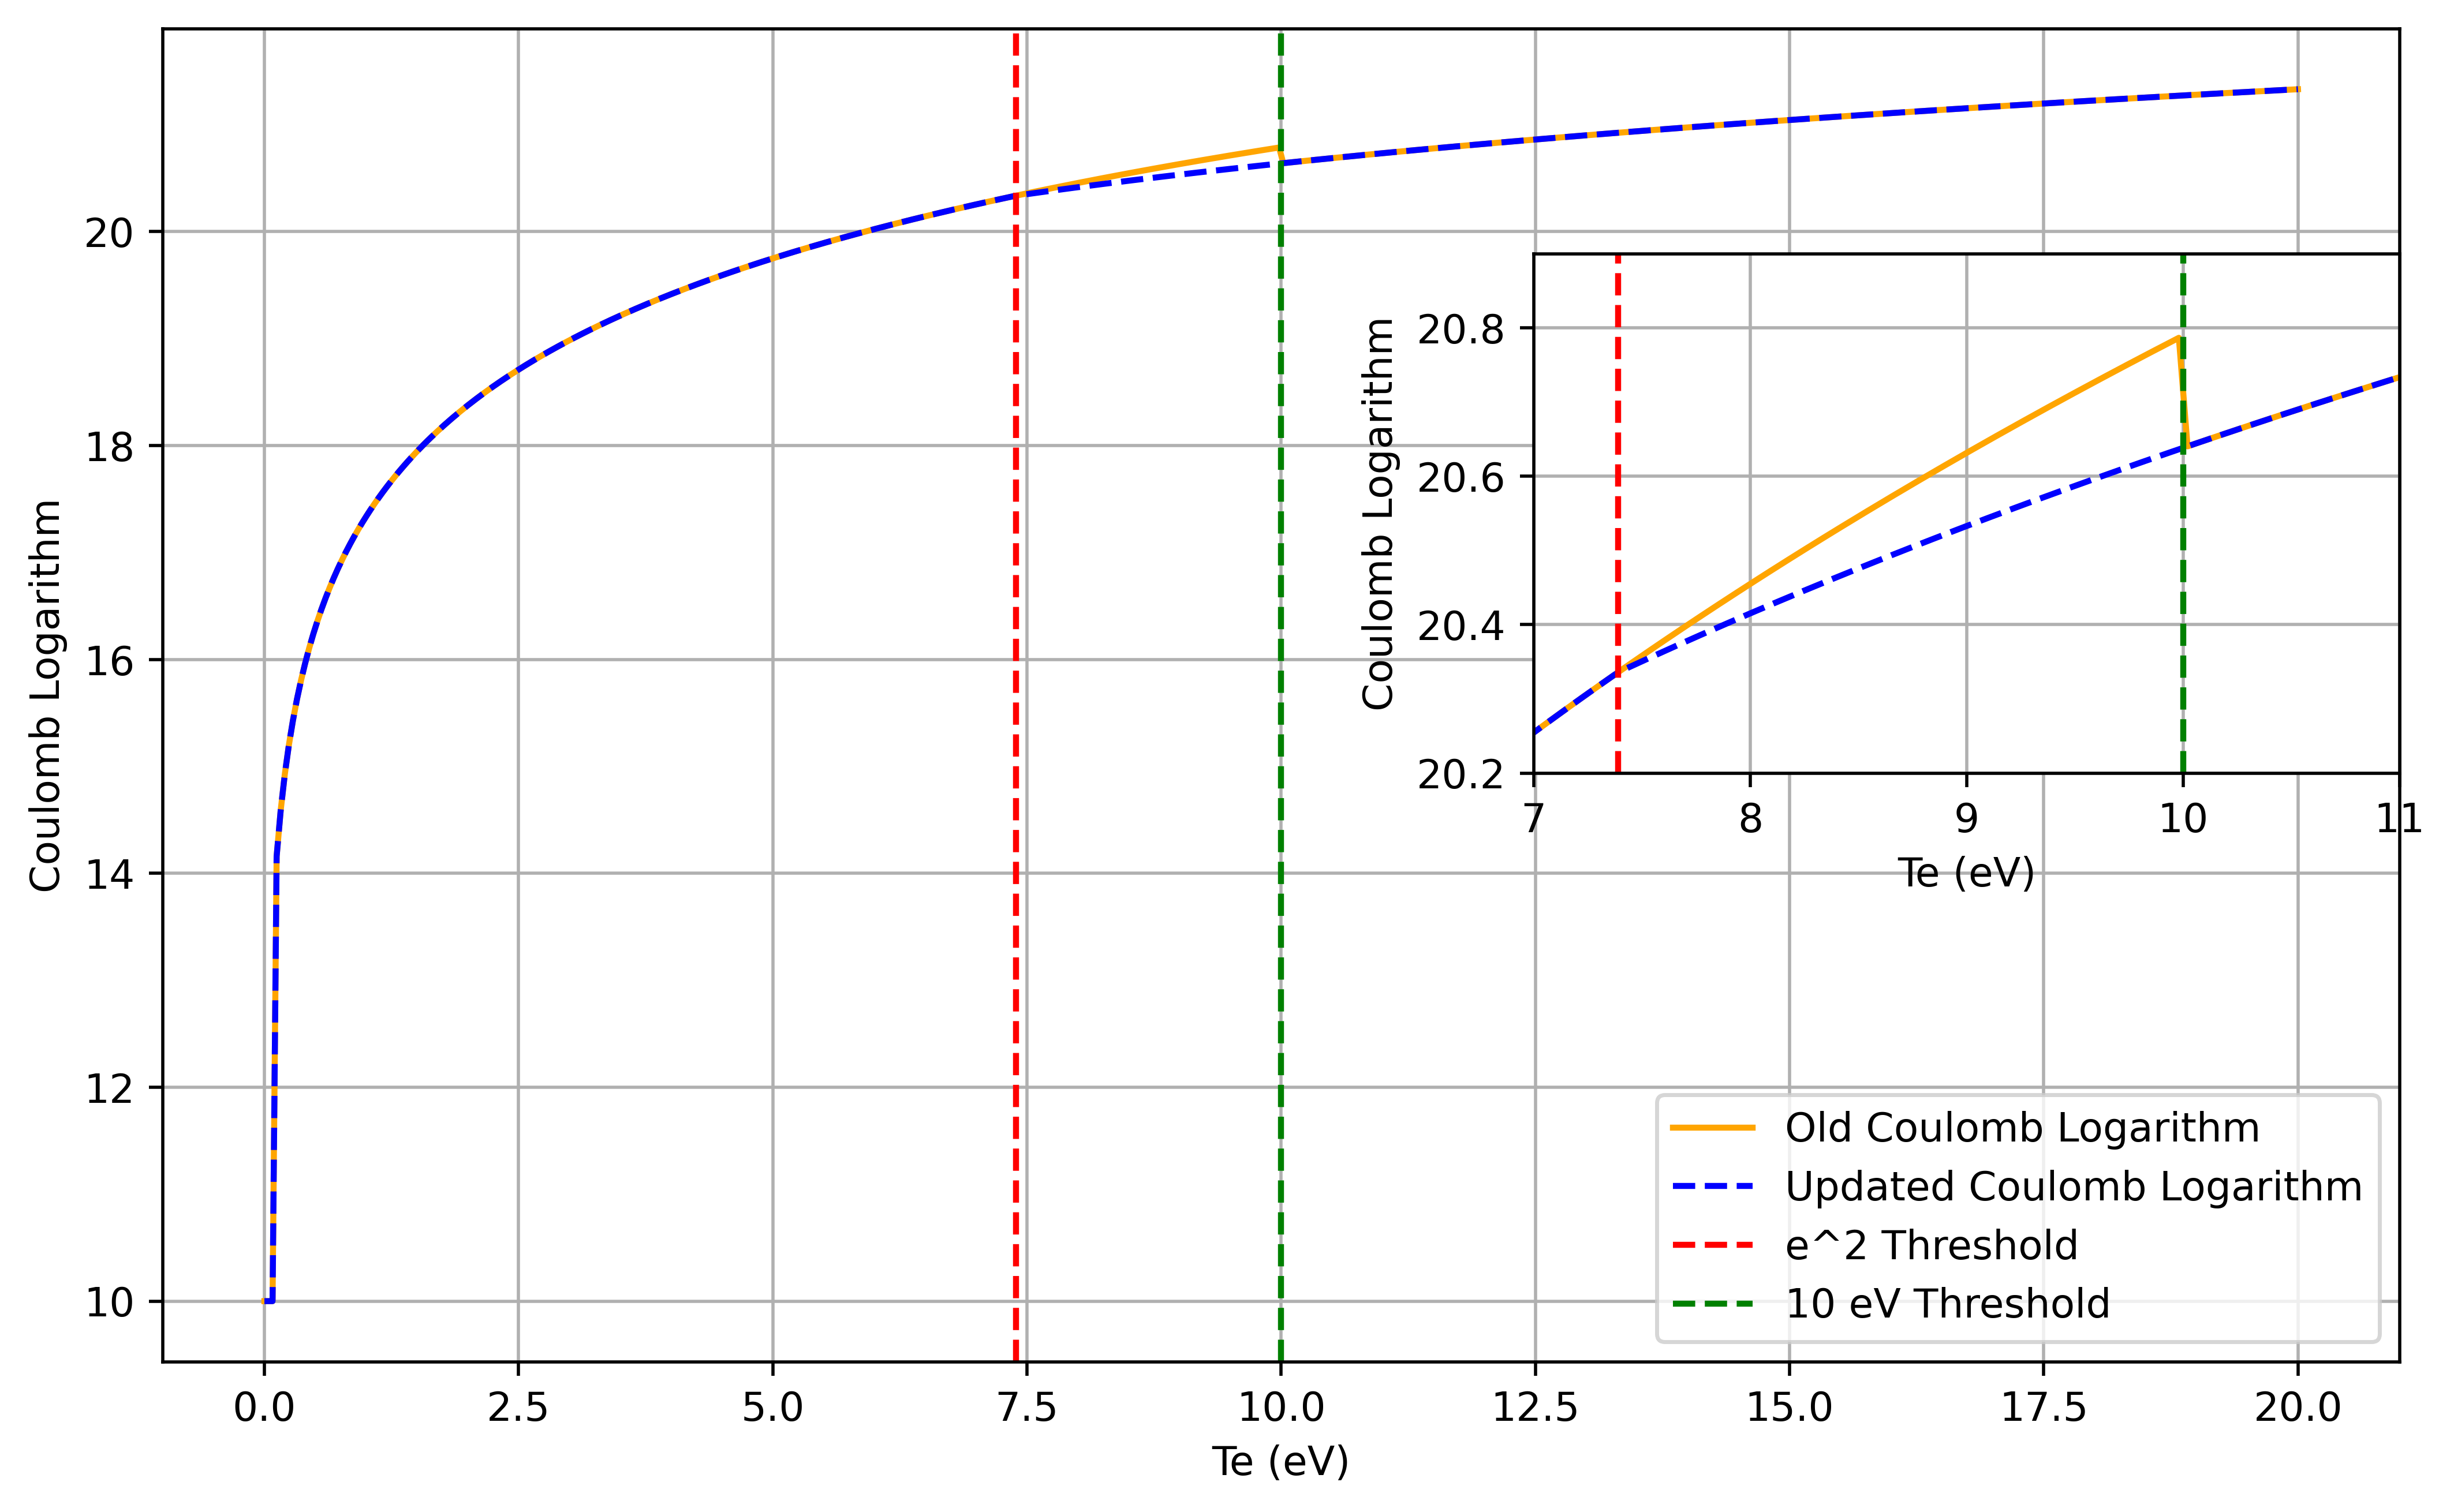

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the function
Ni = 1e11  # Example ion density in m^-3
Ne = 1e11  # Example electron density in m^-3
Ti = 1.0   # Example ion temperature in keV
me_mi = 5.44e-4  # Electron mass to ion mass ratio for protons
Zi = 1      # Charge number for protons
Ai = 1      # Atomic mass number for protons

# Function that returns the Coulomb logarithm based on Te
def coulomb_log_new(Te):
    if (Te < 0.1) or (Ni < 1e10) or (Ne < 1e10):
        return 10
    elif Te < Ti * me_mi:
        return 23 - 0.5 * np.log(Ni) + 1.5 * np.log(Ti) - np.log(Zi**2 * Ai)
    elif Te < np.exp(2.0):  # Stefan's magic number e^2
        return 30.0 - 0.5 * np.log(Ne) - np.log(Zi) + 1.5 * np.log(Te)
    else:
        return 31.0 - 0.5 * np.log(Ne) + np.log(Te)

def coulomb_log_old(Te):
    if (Te < 0.1) or (Ni < 1e10) or (Ne < 1e10):
        return 10
    elif Te < Ti * me_mi:
        return 23 - 0.5 * np.log(Ni) + 1.5 * np.log(Ti) - np.log(Zi**2 * Ai)
    elif Te < 10:
        return 30.0 - 0.5 * np.log(Ne) - np.log(Zi) + 1.5 * np.log(Te)
    else:
        return 31.0 - 0.5 * np.log(Ne) + np.log(Te)

# Generate values for Te up to 20 eV for comparison
Te_values = np.linspace(0, 20, 500)
coulomb_log_values_new = [coulomb_log_new(Te) for Te in Te_values]
coulomb_log_values_old = [coulomb_log_old(Te) for Te in Te_values]

# Create the main plot with inset
fig, ax = plt.subplots(figsize=(10, 8), dpi=500)

# Plot both versions of the Coulomb logarithm
ax.plot(Te_values, coulomb_log_values_old, label="Old Coulomb Logarithm", color='orange')
ax.plot(Te_values, coulomb_log_values_new, label="Updated Coulomb Logarithm", color='blue', linestyle='--')
ax.axvline(x=np.exp(2), color='red', linestyle='--', label='e^2 Threshold')
ax.axvline(x=10, color='green', linestyle='--', label='10 eV Threshold')

# Zoomed-in inset plot for the discontinuity
ax_inset = fig.add_axes([0.60, 0.45, 0.3, 0.3])  # [left, bottom, width, height]
ax_inset.plot(Te_values, coulomb_log_values_old, color='orange')
ax_inset.plot(Te_values, coulomb_log_values_new, color='blue', linestyle='--')
ax_inset.axvline(x=np.exp(2), color='red', linestyle='--')
ax_inset.axvline(x=10, color='green', linestyle='--')

# Set the limits for the zoomed-in region between 7 and 12.5 eV
ax_inset.set_xlim(7, 11)
ax_inset.set_ylim(20.2, 20.9)
ax_inset.grid(True)
ax_inset.set_xlabel("Te (eV)")
ax_inset.set_ylabel("Coulomb Logarithm")

# Labels, legends, and grid
ax.set_xlabel("Te (eV)")
ax.set_ylabel("Coulomb Logarithm")
ax.legend()
ax.grid(True)

plt.show()
